### This is a PROMISE Software Engineering Repository data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

If you publish material based on PROMISE data sets then, please
follow the acknowledgment guidelines posted on the PROMISE repository
web page http://promise.site.uottawa.ca/SERepository .

In [19]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, classification_report, r2_score
from sklearn.model_selection import LeaveOneOut 
from sklearn.cross_validation import train_test_split

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [20]:
df_desharnais = pd.read_csv('../Datasets/02.desharnais.csv',  header=0)
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


## Applying Pearson’s correlation

In this section, the correlations between attributes of Desharnais dataset and software effort are analyzed and applicability of the regression analysis is examined. The correlation between two variables is a measure of how well the variables are related. The most common measure of correlation in statistics is the Pearson Correlation (or the Pearson Product Moment Correlation - PPMC) which shows the linear relationship between two variables. 

Pearson correlation coefficient analysis produces a result between `-1` and `1`. A result of `-1` means that there is a perfect negative correlation between the two values at all, while a result of `1` means that there is a perfect positive correlation between the two variables. 

Results between `0.5` and `1.0` indicate high correlation.Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient. `Pearson’s correlation` (also called Pearson’s R) is a correlation coefficient commonly used in linear regression.

In [21]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


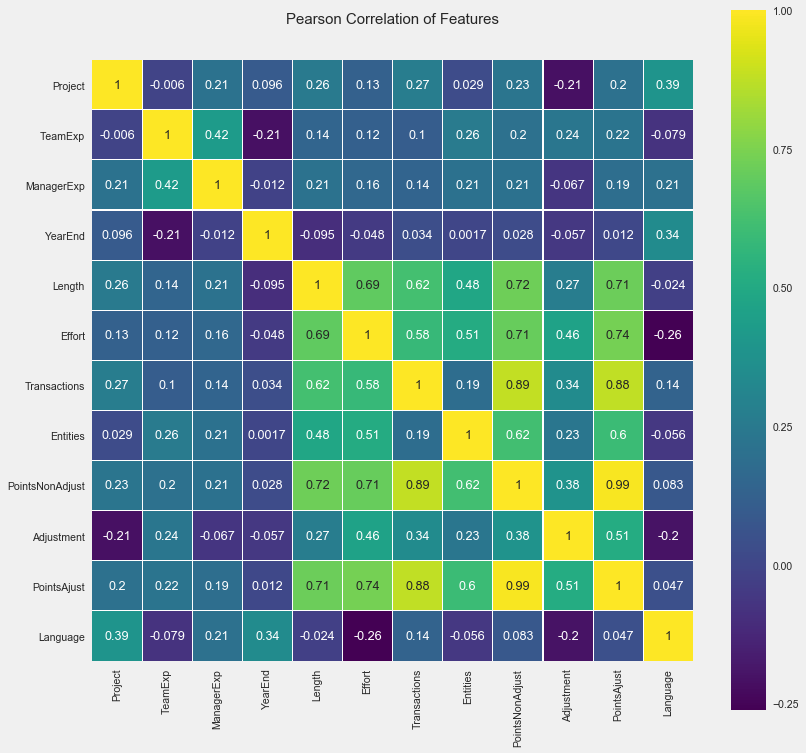

In [22]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [23]:
# split into train and test
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')

features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [24]:
neigh.fit(X_train, y_train) 
print(neigh.score(X_test, y_test))

0.7379861869550943


In [25]:
model = LinearRegression()

features = ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [26]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7680074954440712


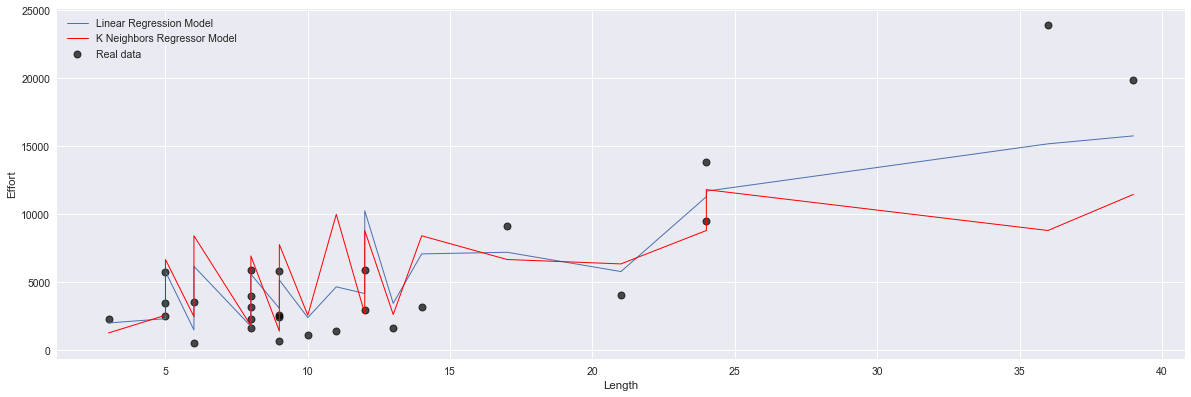

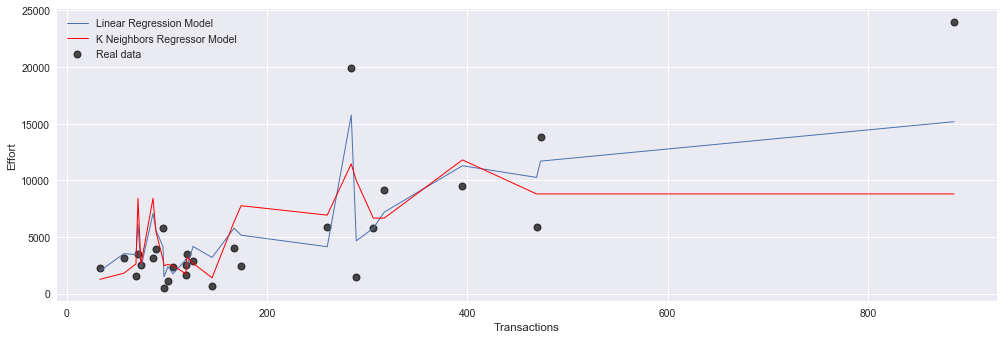

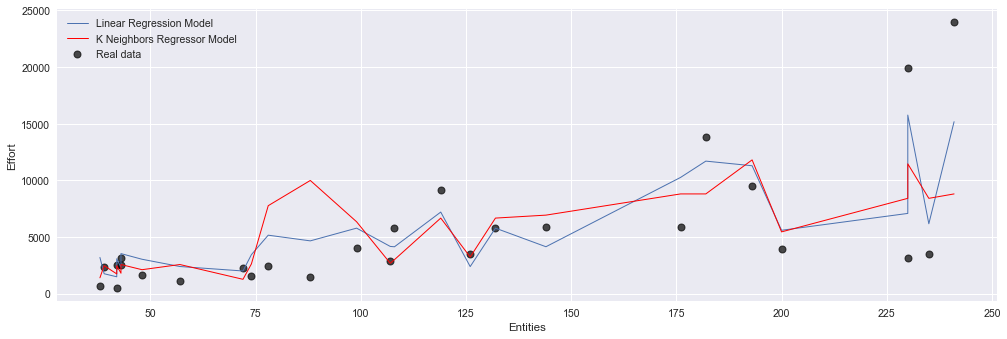

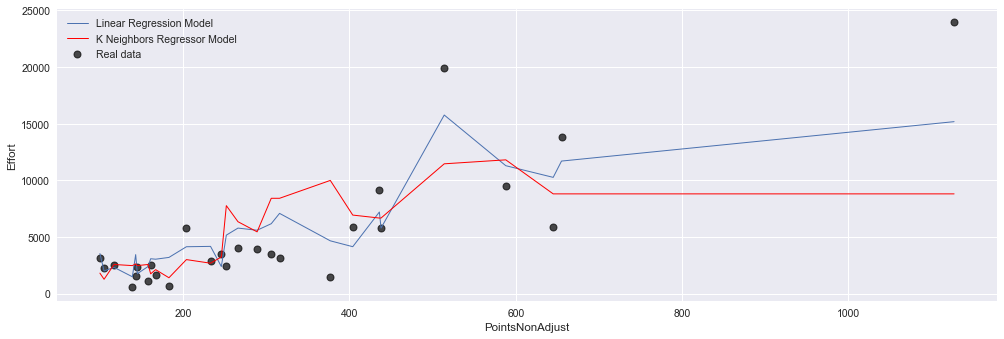

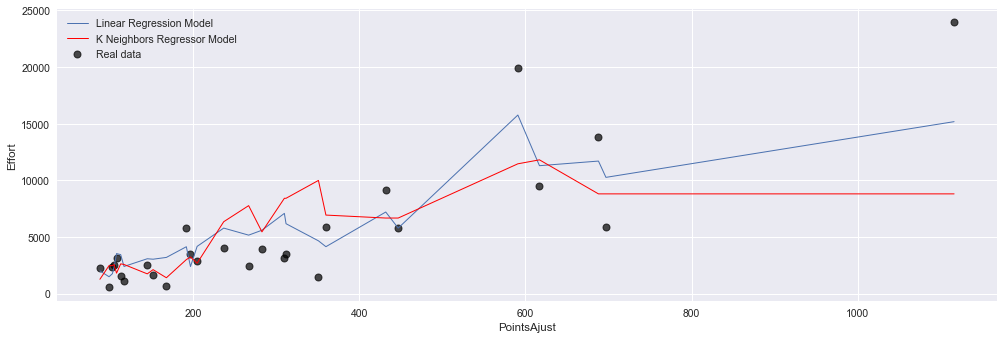

In [27]:
plt.figure(figsize=(18,6))

for i, feature in enumerate(max_corr_features):
   
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))

    
    plt.scatter(X_test[feature], y_test, label='Real data', lw=1,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=1, label='Linear Regression Model')
    plt.plot(xs, ys , lw=1,label='K Neighbors Regressor Model', c='r')
    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()